## 模板匹配

----
* [https://blog.csdn.net/hujingshuang/article/details/47759579](https://blog.csdn.net/hujingshuang/article/details/47759579)

----

模式匹配，即寻找待匹配图像和全体图像中最相似的部分，用于物体检测任务。现在虽然使用卷积神经网络（CNN）来检测物体，但是模式识别仍然是最基本的处理方法。


下面介绍具体算法。原图像记为I（H x W），待匹配图像为T（h x w）：

* 对于图像I：、for ( j = 0, H-h) for ( i = 0, W-w)在一次移动1像素的过程中，原图像I的一部分I(i:i+w, j:j+h)与待匹配图像计算相似度S。
* S最大或最小的地方即为匹配的位置

S的计算方法主要有`SSD`(误差平方和算法)、`SAD`(绝对误差和算法)、`NCC`(归一化积相关算法)、`ZNCC`等

像模式匹配这样，从图像的左上角开始往右进行顺序查找的操作一般称作光栅扫描（Raster Scan）或者滑动窗口(sliding window)扫描

### bug
*　未能进行尺度变化


### Q54 误差平方和算法（Sum of Squared Difference）

使用误差平方和SSD（Sum of Squared Difference）。SSD计算像素值的差的平方和，S取误差平方和最小的地方

```
S = Sum_{x=0:w, y=0:h} (I(i+x, j+y) - T(x, y) )^2
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

52 14


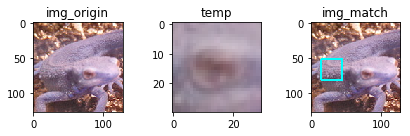

In [2]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()
(H, W, C) = img.shape
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

temp = cv2.imread("temp.jpg")
(tH, tW, tC) = temp.shape
temp_gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

def ssd(temp, src):
    dis = np.sum((temp -src)**2)
    return dis

h_select = 0
w_select = 0
dis_min = 99999999
for h in range(H-tH):
    for w in range(W-tW):
        dis = ssd(temp_gray, img_gray[h:h+tH, w:w+tW])
#         img = img_origin.copy()
#         cv2.rectangle(img, (w, h), (w+tW, h+tH), (0,255,255), 1)
#         cv2.imshow("img ", img)
#         cv2.imshow("img_corp", img[h:h+tH, w:w+tW])
#         if (cv2.waitKey() & 0xFF) == ord("q"):
#             cv2.destroyAllWindows()
#             sys.eixt()
#         print(dis)
        if dis < dis_min:
            dis_min = dis
            h_select = h
            w_select = w
            
cv2.rectangle(img, (w_select, h_select), (w_select+tW, h_select+tH), (0, 255, 255), 2)
print(h_select, w_select)

plt.subplot(131)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(132)
plt.imshow(temp)
plt.title("temp")
plt.subplot(133)
plt.imshow(img)
plt.title("img_match")
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, 
                    hspace=0.25, wspace=0.55)
plt.show()    